In [29]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/Users/mohod/Developer/OTsim/brownian_ot')
# %matplotlib inline
import analysis as ana
from brownian_ot import analysis as anb
import asdf

# af = asdf.open("example.asdf")

In [30]:
lcpRaw = ana.expand_trajectory(np.load("/Users/mohod/Developer/otsim/data/D3/data/10sec_LCP_0.03_3768498.npy"))
rcpRaw = ana.expand_trajectory(np.load("/Users/mohod/Developer/otsim/data/D3/data/10sec_RCP_0.03_1432530.npy"))
lcpAF = asdf.open("/Users/mohod/Developer/otsim/data/D3/data/10sec_LCP_0.03_3768498.asdf")
rcpAF = asdf.open("/Users/mohod/Developer/otsim/data/D3/data/10sec_RCP_0.03_1432530.asdf")
lcfAFT = ana.expand_trajectory(lcpAF["trajectory"])
rcfAFT = ana.expand_trajectory(rcpAF["trajectory"])


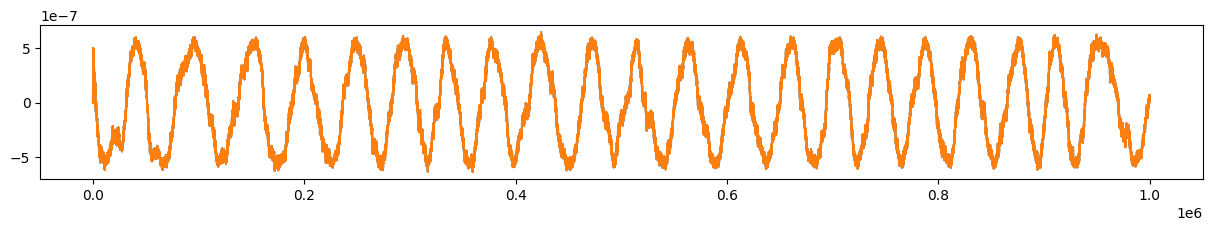

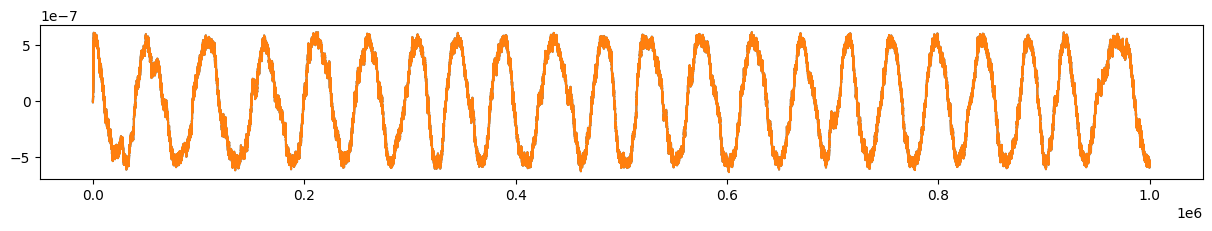

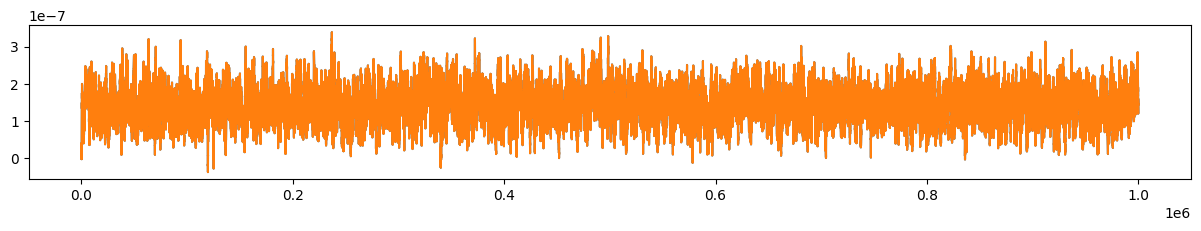

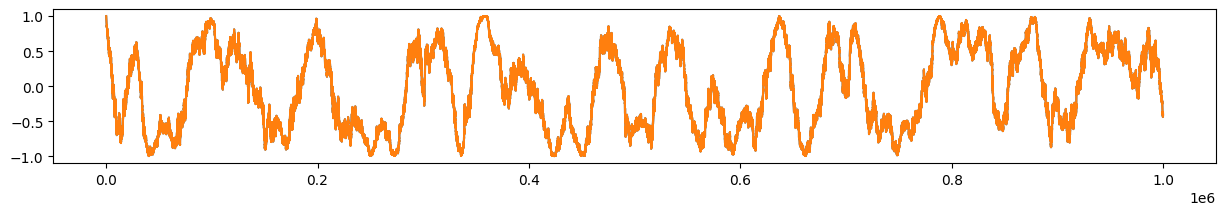

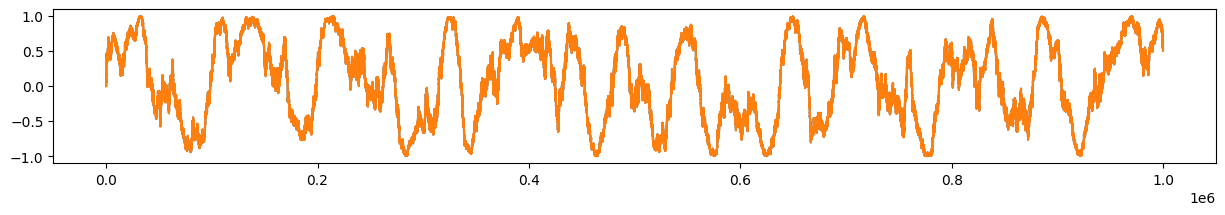

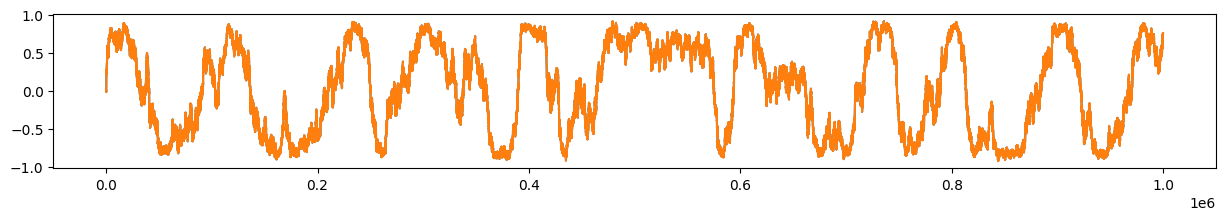

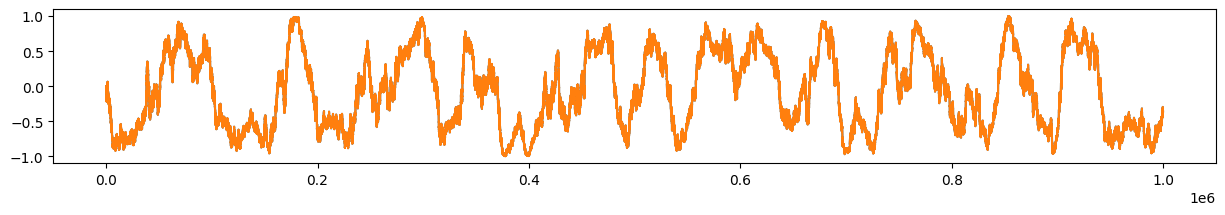

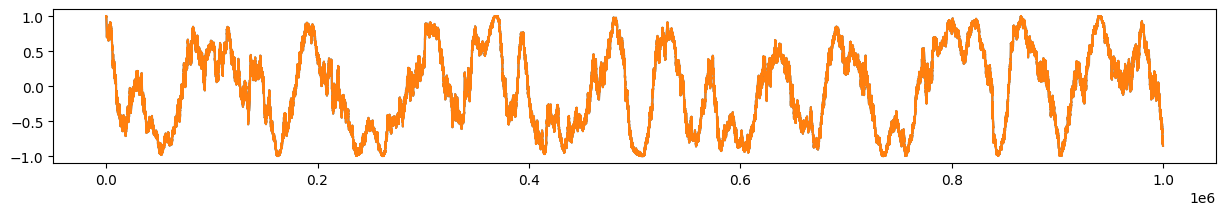

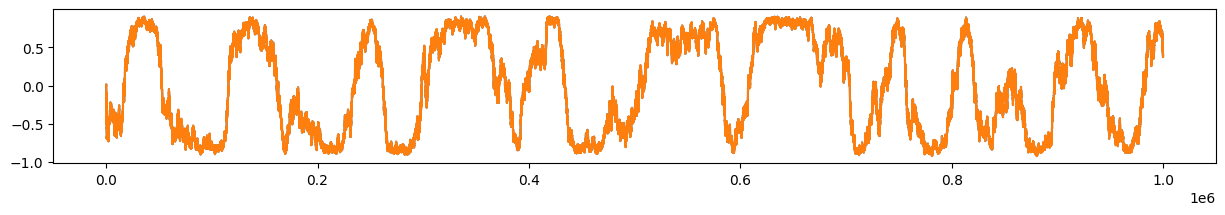

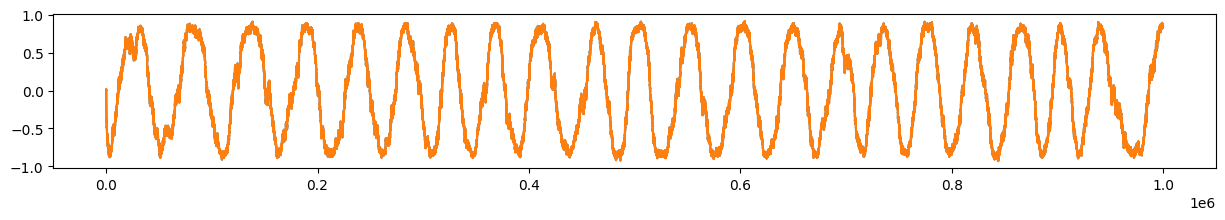

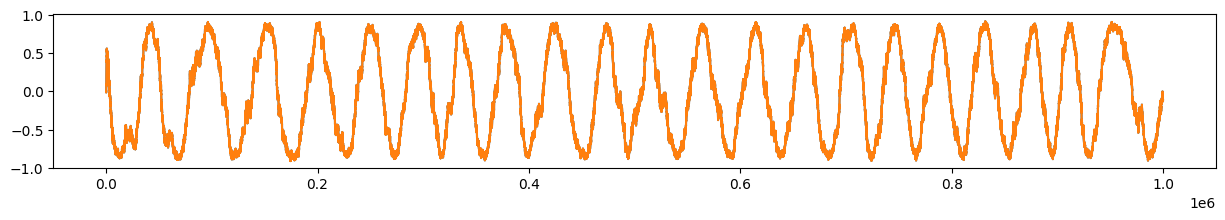

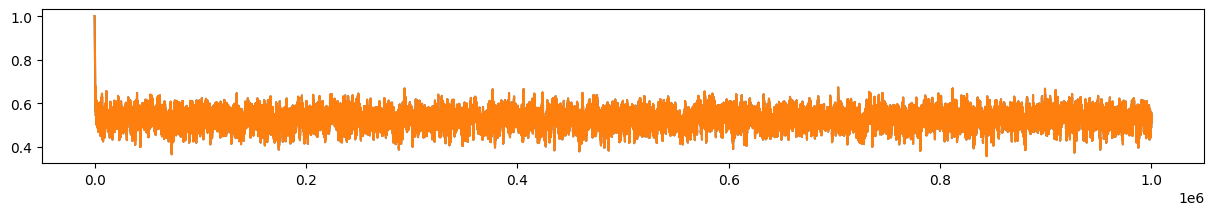

In [31]:
for i in range(12):
    plt.figure(figsize=(15, 2))
    plt.plot(lcpRaw[:,i])
    plt.plot(lcfAFT[:,i])


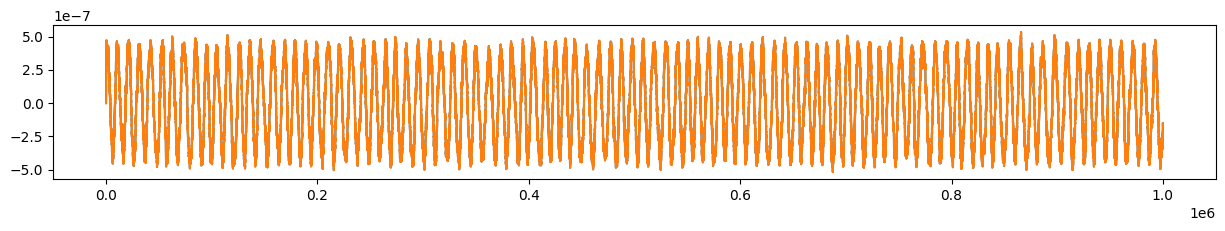

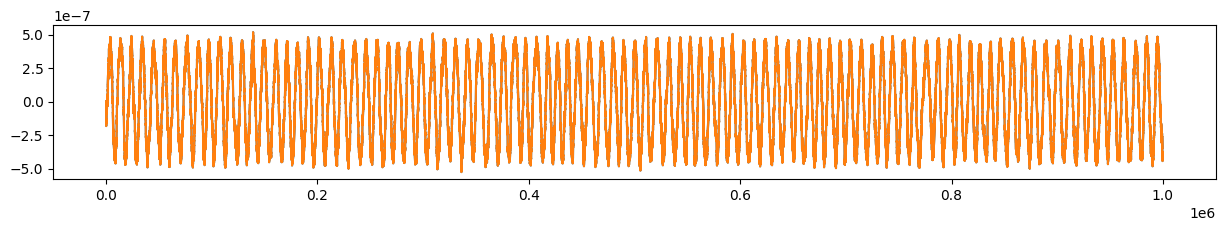

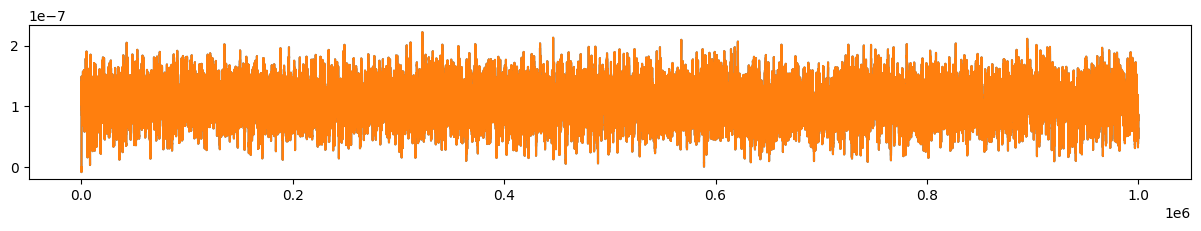

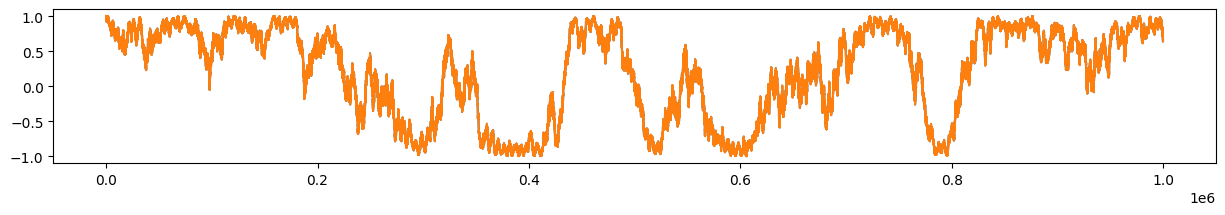

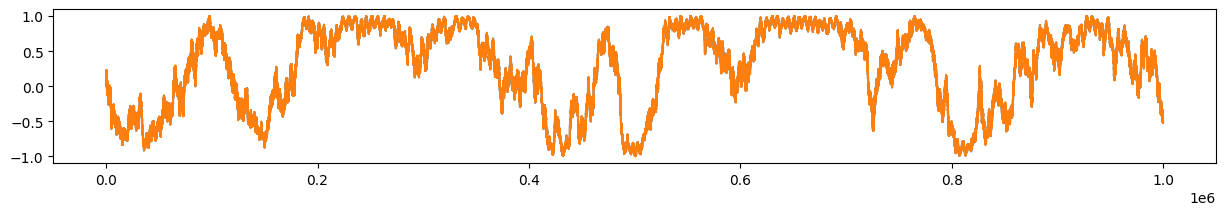

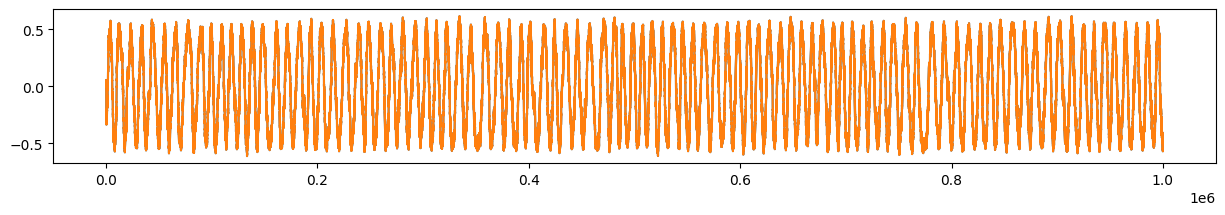

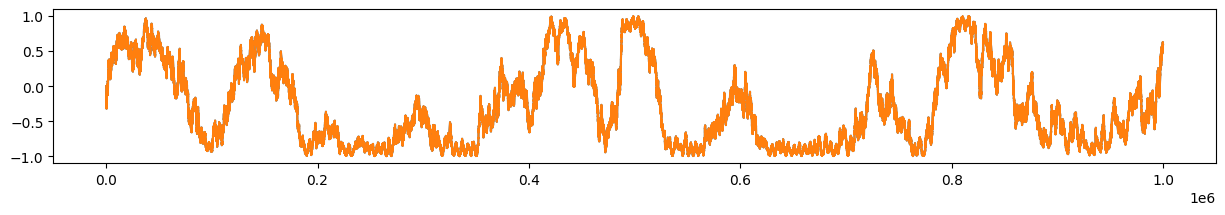

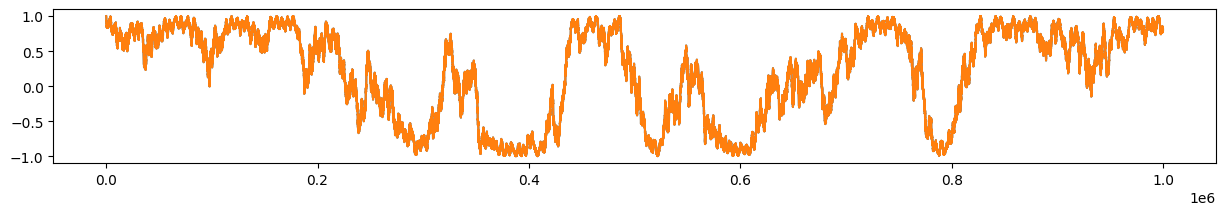

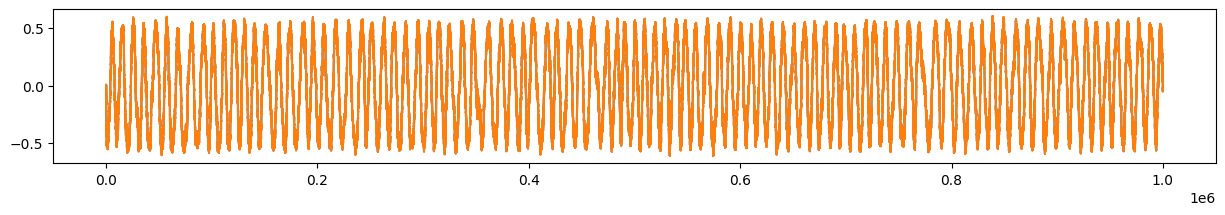

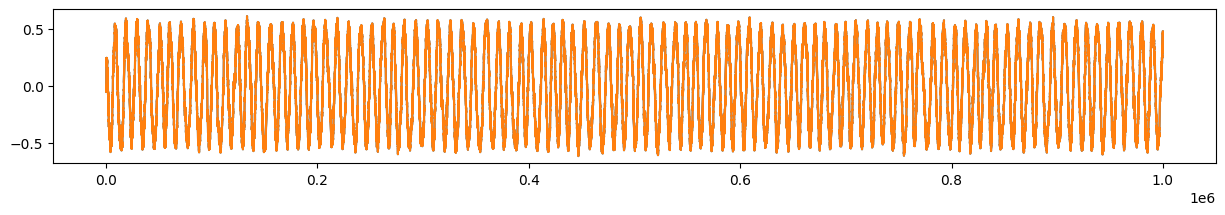

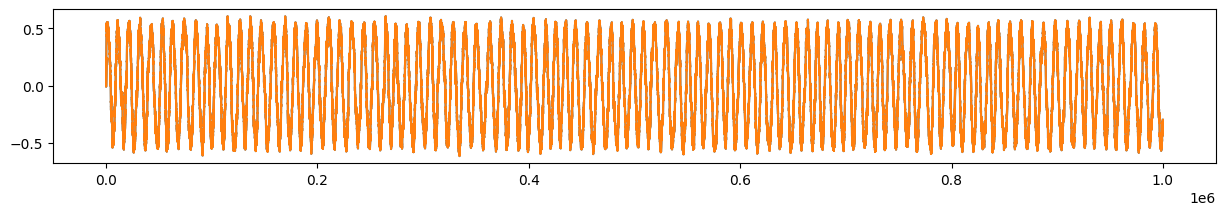

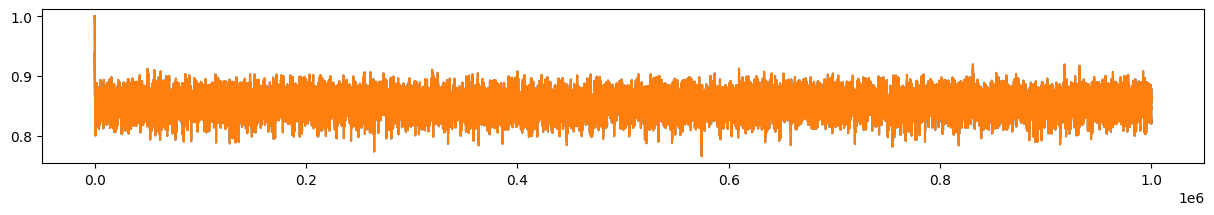

In [32]:
for i in range(12):
    plt.figure(figsize=(15, 2))
    plt.plot(rcpRaw[:,i])
    plt.plot(rcfAFT[:,i])

In [33]:
# getArrayTraj 
def getArrayTraj(toFind):
    trajs=[]
    Path =  "/Users/mohod/Developer/otsim/data/"
    folders  = os.listdir(Path)
    # print(folders)
    for id in toFind:
        for folder in folders:
            # print(folder)
            if(folder[0] != "."):
                files=""
                # try:
                files = os.listdir(Path+folder+"/data/")
                # print(Path+folder+"/data/")
                # except Exception:
                #     print("some")
                #     pass
                for file in files:
                    # print(Path+folder+"/data/")
                    filename = file.split("_")
                    # print(filename[-1])
                    uuid = int(filename[-1].split(".")[0])
                    # print(filename[-1].split(".")[1])
                    if uuid == id and filename[-1].split(".")[1] == "asdf":
                        sim = asdf.open(Path+folder+"/data/"+file)
                        traj = sim["trajectory"]
                        trajs.append([
                            Path+folder+"/data/"+file,
                            ana.expand_trajectory(traj),
                            sim])
    return trajs

In [34]:
# modes_ = [-5,-4,-3,-2,-1,1,2,3,4,5]

# LCP_modeVar_ = getArrayTraj([3080017,4099843,3864095,6705893,2789572,2322232,5118391,1544562,6897390,5357862])
# RCP_modeVar_ = getArrayTraj([6491602,4061540,6244212,2548265,1762004,7167251,9785005,6558493,5600605,4317625])

modes_ = [0.02,0.03,0.04]

# LCP_modeVar_ = getArrayTraj([1432530])
RCP_modeVar_ = getArrayTraj([4345160,1432530,4071028])
print(RCP_modeVar_[0][1].shape)
print(len(RCP_modeVar_))
ratio = 50

for m in range(len(modes_)):
    # print(LCP_modeVar_[m][1].shape,RCP_modeVar_[m][1].shape)
    
    # LCP_modeVar_[m][1] = LCP_modeVar_[m][1][:-1:ratio,:]
    # print(LCP_modeVar_[m][1].shape, "LCP")
    RCP_modeVar_[m][1] = RCP_modeVar_[m][1][::ratio,:]
    # if m < 10 - 3:
    #     RCP_modeVar_[m][1] = RCP_modeVar_[m][1][:-1:ratio,:]
        # print(RCP_modeVar_[m][1].shape, "RCP")


# RCP_modeVar_[7][1] = RCP_modeVar_[7][1][:-1:ratio*2,:]
# RCP_modeVar_[8][1] = RCP_modeVar_[8][1][:-1:ratio*2,:]
# RCP_modeVar_[9][1] = RCP_modeVar_[9][1][:-1:ratio*2,:]

for m in range(len(modes_)):
    # print(LCP_modeVar_[m][1].shape, "LCP")
    print(RCP_modeVar_[m][1].shape, "RCP")
    # plt.plot(LCP_modeVar_[m][1][:,0])
    

(1000001, 12)
3
(20001, 12) RCP
(20001, 12) RCP
(20001, 12) RCP


In [39]:
LCP_dorb= []
RCP_dorb= []

for i in range(len(modes_)):
    # LCP_dorb.append(ana.deorbit_particle_axes(LCP_modeVar_[i][1]))
    # print(RCP_modeVar_[i][1].shape)
    # print(ana.deorbit_particle_axes(RCP_modeVar_[i][1]))
    RCP_dorb.append(ana.deorbit_particle_axes(RCP_modeVar_[i][1]))
    

LCP_dorb = np.array(LCP_dorb)
print(LCP_dorb.shape)
RCP_dorb = np.array(RCP_dorb)
print(RCP_dorb.shape)

(0,)
(3, 20001, 12)


In [40]:
LCP_axisCor= []
RCP_axisCor= []

# temp = anb.calc_axis_autocorr(LCP_modeVar_[0][1], max_steps=20000)

for i in range(len(modes_)):
    maxStep = int(len(RCP_dorb[i][:,0])*0.1)
    print(maxStep)
    # LCP_axisCor.append(np.array(anb.calc_axis_autocorr(LCP_dorb[i], max_steps=maxStep)))
    RCP_axisCor.append(np.array(anb.calc_axis_autocorr(RCP_dorb[i], max_steps=maxStep)))

2000
2000
2000


RCP Traj: /Users/mohod/Developer/otsim/data/D3/data/10sec_RCP_0.02_4345160.asdf


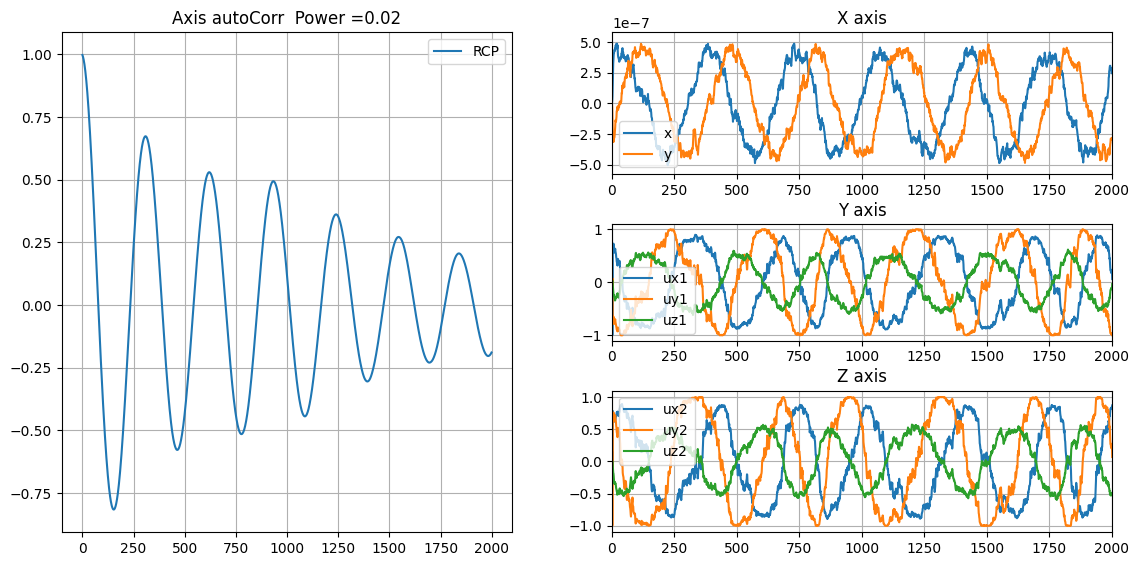

RCP Traj: /Users/mohod/Developer/otsim/data/D3/data/10sec_RCP_0.03_1432530.asdf


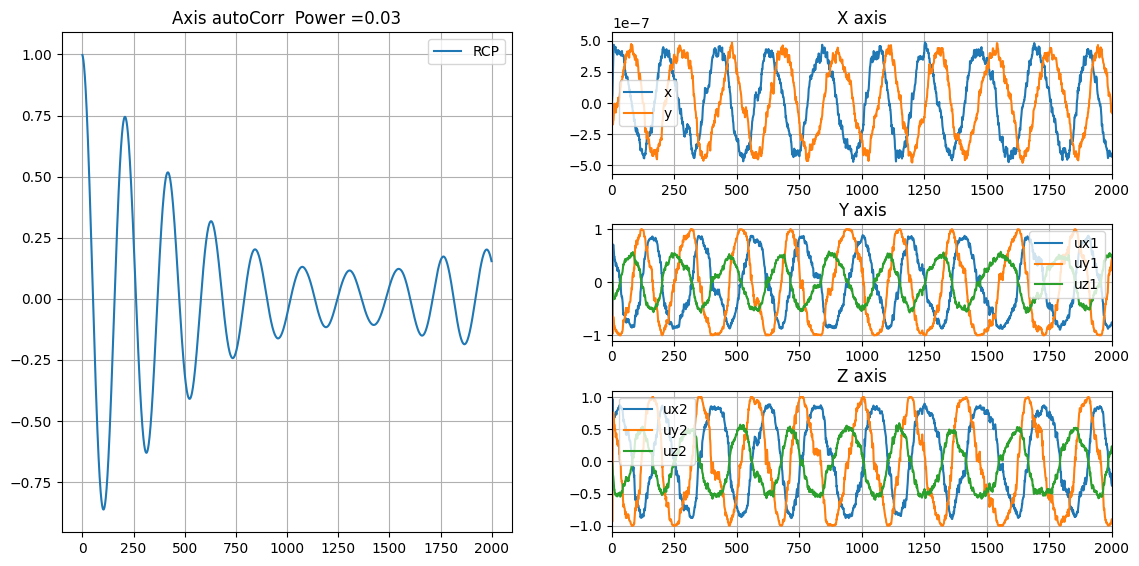

RCP Traj: /Users/mohod/Developer/otsim/data/D3/data/10sec_RCP_0.04_4071028.asdf


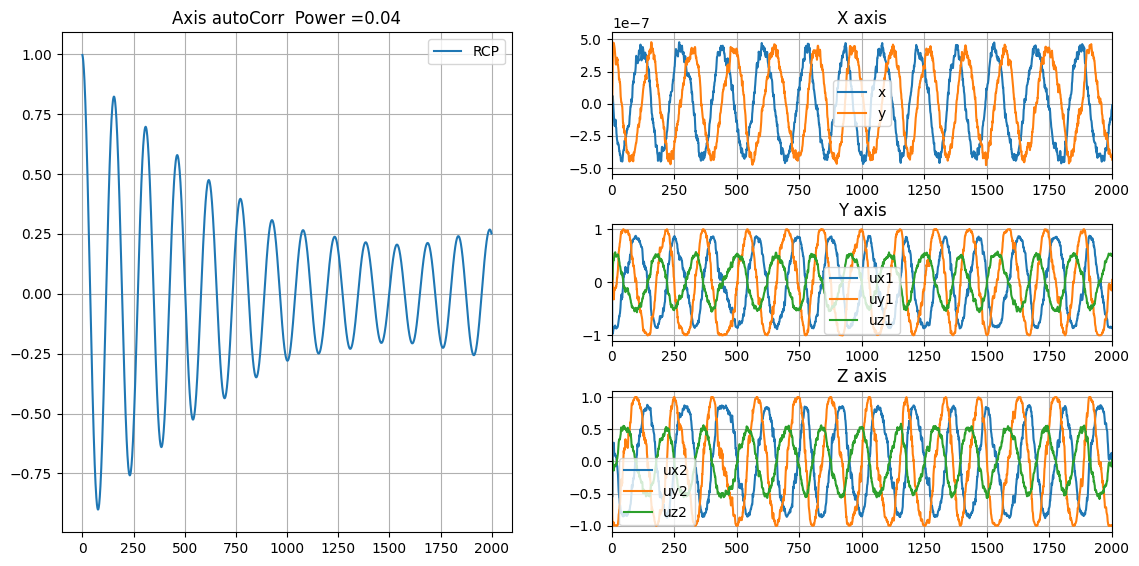

In [41]:
count=0
for i in range(len(modes_)):
    # plt.figure()
    # plt.title(str(modes_[count]))
    # plt.plot(LCP_axisCor[i][0,:],label="LCP")
    # plt.plot(RCP_axisCor[i][0,:],label="RCP")
    # plt.legend()
    # plt.grid()
    # print("LCP Traj:", LCP_modeVar_[i][0])
    print("RCP Traj:", RCP_modeVar_[i][0])
    
    fig = plt.figure(figsize=(10,5))
    
    ax1 = fig.add_axes([0, 0, 0.45, 1]) 
    ax1.grid()
    ax1.set_title("Axis autoCorr  Power ="+ str(modes_[i]))
    # ax1.plot(LCP_axisCor[i][0,:],label="LCP")  
    ax1.plot(RCP_axisCor[i][0,:],label="RCP")  
    ax1.legend()
    
    ax2 = fig.add_axes([0.55, 2/3 +0.05, 0.5, 1/3 -0.05])  
    ax2.grid()
    ax2.set_title("X axis")
    ax2.plot(RCP_modeVar_[i][1][:,0],label="x") 
    ax2.plot(RCP_modeVar_[i][1][:,1],label="y") 
    ax2.set_xlim(0,2000)
    ax2.legend()
    
    ax3 = fig.add_axes([0.55, 1/3 +0.05, 0.5, 1/3 -0.1])  
    ax3.grid()
    ax3.set_title("Y axis")
    ax3.plot(RCP_dorb[i][:,3],label="ux1") 
    ax3.plot(RCP_dorb[i][:,4],label="uy1")
    ax3.plot(RCP_dorb[i][:,5],label="uz1")
    ax3.set_xlim(0,2000)
    ax3.legend() 
    
    ax4 = fig.add_axes([0.55, 0, 0.5, 1/3 -0.05])  
    ax4.grid()
    ax4.set_title("Z axis")
    ax4.plot(RCP_dorb[i][:,6],label="ux2") 
    ax4.plot(RCP_dorb[i][:,7],label="uy2") 
    ax4.plot(RCP_dorb[i][:,8],label="uz2") 
    ax4.set_xlim(0,2000)
    ax4.legend()
    plt.show()
    

    count+=1